In [5]:
from ultralytics import YOLO

data_yaml = r"C:/Users/Nathanael F/Documents/Semester5/CK/data.yaml"

# Load your trained model (recommended)
model = YOLO(r"C:/Users/Nathanael F/Documents/Semester5/CK/runs/detect/train3/weights/best.pt")

# Validate (this computes metrics)
metrics = model.val(data=data_yaml, imgsz=640, device=0, workers=0)


Ultralytics 8.3.249  Python-3.12.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 13.05.8 MB/s, size: 77.3 KB)
val: Scanning C:\Users\Nathanael F\Documents\Semester5\CK\my_dataset\labels\val.cache... 39 images, 11 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.1it/s 1.9s0.7s
                   all         50         54      0.866      0.749      0.819      0.687
                   Red         12         15      0.807      0.867      0.841      0.739
                  Blue         15         24      0.792      0.542      0.725       0.52
                 Green         12         15          1      0.839       0.89      0.803
Speed: 2.2ms preprocess, 13.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results s

In [6]:
# Overall metrics
P = float(metrics.box.mp)      # mean precision
R = float(metrics.box.mr)      # mean recall
mAP50 = float(metrics.box.map50)
mAP5095 = float(metrics.box.map)

F1 = (2 * P * R) / (P + R + 1e-16)

print("=== Overall Metrics ===")
print(f"Precision (P):   {P:.4f}")
print(f"Recall (R):      {R:.4f}")
print(f"F1-score:        {F1:.4f}")
print(f"mAP@50:          {mAP50:.4f}")
print(f"mAP@50-95:       {mAP5095:.4f}")


=== Overall Metrics ===
Precision (P):   0.8661
Recall (R):      0.7491
F1-score:        0.8034
mAP@50:          0.8187
mAP@50-95:       0.6872


In [7]:
import numpy as np
import pandas as pd

names = model.names  # class names dict: {0:'Red',1:'Blue',...}

p_cls = metrics.box.p      # precision per class (array)
r_cls = metrics.box.r      # recall per class (array)
ap50_cls = metrics.box.ap50  # AP@50 per class
ap_cls = metrics.box.ap      # AP@50-95 per class

f1_cls = (2 * p_cls * r_cls) / (p_cls + r_cls + 1e-16)

df = pd.DataFrame({
    "class_id": np.arange(len(p_cls)),
    "class_name": [names[i] for i in range(len(p_cls))],
    "precision": p_cls,
    "recall": r_cls,
    "f1": f1_cls,
    "AP@50": ap50_cls,
    "AP@50-95": ap_cls
})

df.sort_values("f1", ascending=False, inplace=True)
df


,class_id,class_name,precision,recall,f1,AP@50,AP@50-95
2,2,Green,1.000000,0.838895,0.912390,0.890350,0.802957
0,0,Red,0.806513,0.866667,0.835508,0.840622,0.738879
1,1,Blue,0.791825,0.541667,0.643281,0.725164,0.519814


In [8]:
from PIL import Image
from glob import glob

# Find latest confusion matrix image in runs
paths = sorted(glob("runs/detect/val*/confusion_matrix.png") + glob("runs/detect/train*/confusion_matrix.png"))
paths[-1] if paths else "Not found"


'runs/detect\\val3\\confusion_matrix.png'

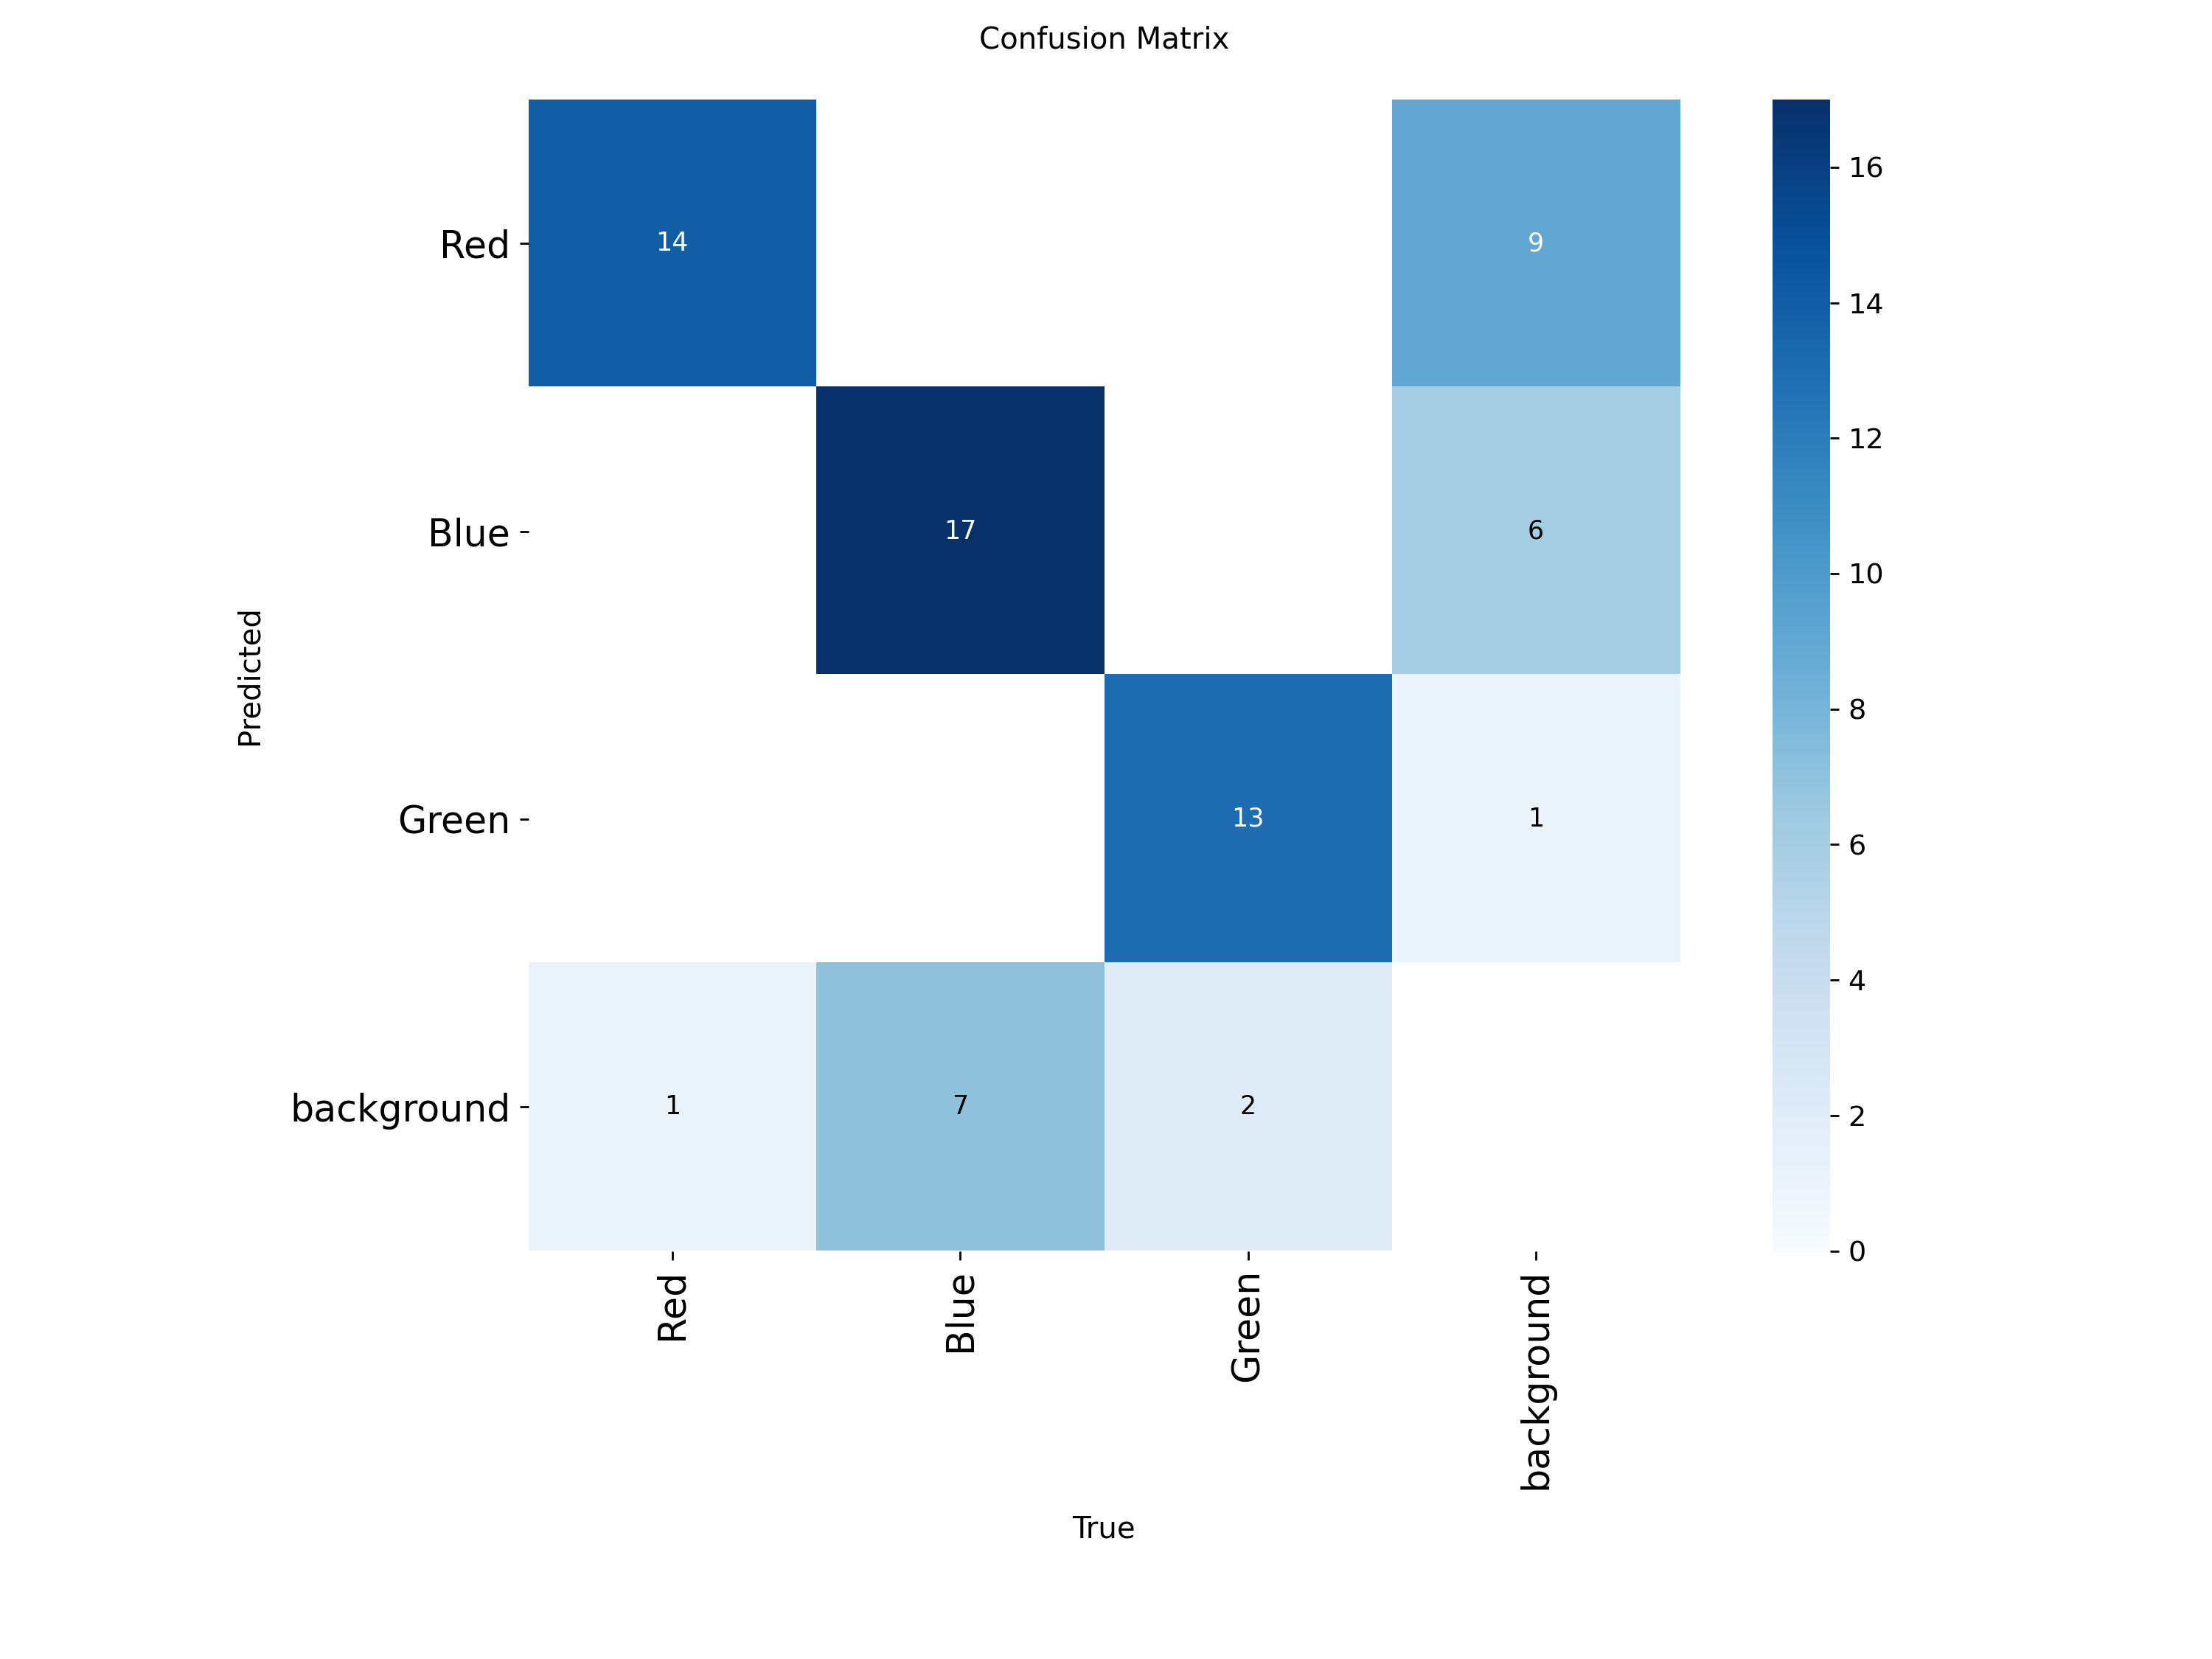

In [9]:
Image.open(paths[-1])